## Python Week 9 HW

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [70]:
os.chdir('D:\Data analysis\DataScience Academy\Python course\Week 9')

In [71]:
data = pd.read_csv('./heart_disease_dataset.csv', sep=';')

df=data.copy()

df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [72]:
df.isnull().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
target                     0
dtype: int64

In [73]:
df.corr()['target']

age                       -0.225439
sex                       -0.280937
chest_pain_type            0.433798
resting_blood_pressure    -0.144931
cholesterol               -0.085239
fasting_blood_sugar       -0.028046
rest_ecg                   0.137230
max_heart_rate_achieved    0.421741
exercise_induced_angina   -0.436757
st_depression             -0.430696
st_slope                   0.345877
num_major_vessels         -0.391724
thalassemia               -0.344029
target                     1.000000
Name: target, dtype: float64

<AxesSubplot:>

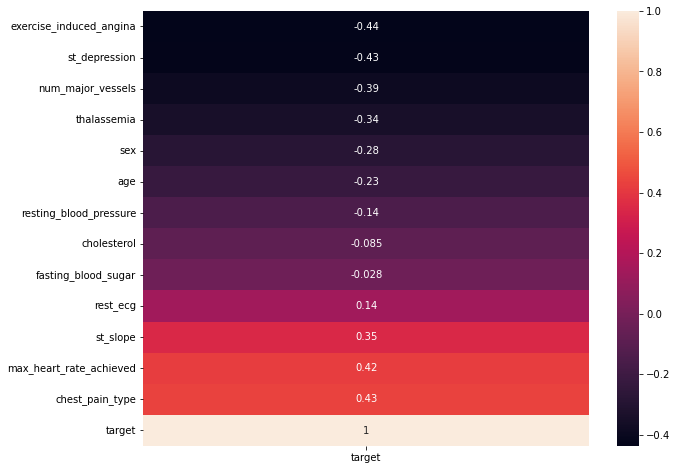

In [74]:
plt.figure(figsize=(10,8))

sns.heatmap(df.corr()[['target']].sort_values(by='target'), annot=True)

In [59]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<AxesSubplot:xlabel='target', ylabel='count'>

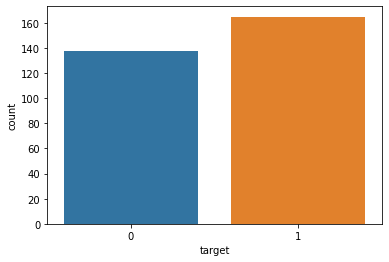

In [101]:
sns.countplot(data=df, x = 'target')

In [75]:
X=df.drop('target', axis=1)

y = df.target.to_numpy().reshape([-1,1])

In [76]:
X.shape, y.shape

((303, 13), (303, 1))

In [19]:
from sklearn.preprocessing import StandardScaler

In [77]:
scaler = StandardScaler()

In [78]:
X = scaler.fit_transform(X)

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=101)

In [81]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(242, 13)
(61, 13)
(242, 1)
(61, 1)


In [82]:
import torch  # tensor operaations
import torch.nn as nn # creating our architecture
import torch.nn.functional as F # easy collable functions
import torch.optim as optim # optimisation functions
from torch.utils.data import DataLoader # creating a data loader
from torch.utils.data import TensorDataset # creating a tensor dataset

## Converting arrays to tensors

In [83]:
X_train= torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).float()
X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).float()

In [84]:
## Next we are creating train-test datasets

train_dataset =TensorDataset(X_train, y_train)
test_dataset =TensorDataset(X_test, y_test)

In [85]:
## Creating data loaders for train_test datasets separately

train_loader =DataLoader(train_dataset,batch_size=50,shuffle=True)
test_loader =DataLoader(test_dataset,shuffle=True)

In [89]:
## Defining model architecture

class Model(nn.Module):
    def __init__(self):
        super(Model,self).__init__()
        
        self.fc1 = nn.Linear(13,50) ## 13 is a feature number; 13 features are going into 10 neurons
        self.out = nn.Linear(50,1) ## The result that came out of those 10 neurons combines into one output

    def forward(self,X):
        X = F.relu(self.fc1(X))
        X = self.out(X)
        return X
    

In [90]:
model = Model()

In [91]:
def get_n_params(model):
    pp=0
    for p in list(model.parameters()):
        nn=1
        for s in list(p.size()):
            nn = nn*s
        pp += nn
    return pp

In [92]:
get_n_params(model)

751

In [93]:
num_epochs = 50
lr_rate = 0.03
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(model.parameters(),lr=lr_rate)

In [94]:
def binary_acc(y_pred,y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred)) ## turns all values above 0.5 to 1 and below 0.5 to 0
    
    correct_results_sum = (y_pred_tag==y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc*100)
    return acc

In [95]:
model.train()
for e in range(1,num_epochs+1):
    epoch_loss = 0 ## to keep track of total loss for current epoch
    epoch_acc = 0 ## to keep track of total acc for current epoch
    for X_batch,y_batch in train_loader:
        optimizer.zero_grad() ## to start fresh with each batch
        y_pred = model(X_batch)
        
        loss = criterion(y_pred.flatten(),y_batch.flatten().float())
        acc = binary_acc(y_pred.flatten(),y_batch.flatten().float())
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    print(f'Epoch: {e+0:03}: |Loss:{epoch_loss/len(train_loader):.5f}|Acc: {epoch_acc/len(train_loader):.3f}')

Epoch: 001: |Loss:0.72697|Acc: 38.800
Epoch: 002: |Loss:0.69889|Acc: 49.600
Epoch: 003: |Loss:0.67419|Acc: 63.000
Epoch: 004: |Loss:0.65425|Acc: 69.800
Epoch: 005: |Loss:0.63348|Acc: 73.400
Epoch: 006: |Loss:0.61496|Acc: 75.800
Epoch: 007: |Loss:0.59863|Acc: 78.000
Epoch: 008: |Loss:0.58333|Acc: 77.600
Epoch: 009: |Loss:0.56868|Acc: 76.800
Epoch: 010: |Loss:0.55520|Acc: 77.400
Epoch: 011: |Loss:0.54234|Acc: 77.800
Epoch: 012: |Loss:0.53100|Acc: 77.400
Epoch: 013: |Loss:0.51930|Acc: 77.800
Epoch: 014: |Loss:0.50681|Acc: 79.800
Epoch: 015: |Loss:0.49765|Acc: 80.200
Epoch: 016: |Loss:0.49056|Acc: 80.200
Epoch: 017: |Loss:0.48028|Acc: 80.200
Epoch: 018: |Loss:0.47306|Acc: 80.200
Epoch: 019: |Loss:0.46395|Acc: 80.400
Epoch: 020: |Loss:0.45721|Acc: 80.800
Epoch: 021: |Loss:0.45286|Acc: 80.400
Epoch: 022: |Loss:0.44272|Acc: 80.800
Epoch: 023: |Loss:0.43637|Acc: 81.000
Epoch: 024: |Loss:0.43425|Acc: 80.600
Epoch: 025: |Loss:0.42793|Acc: 81.000
Epoch: 026: |Loss:0.42245|Acc: 81.000
Epoch: 027: 

## Testing the model

In [96]:
y_pred_list = []

model.eval()

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        torch.no_grad()
        y_test_pred = model(X_batch)
        y_test_pred = torch.sigmoid(y_test_pred)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list.append(y_pred_tag.numpy())
y_pred_list = [a.squeeze().tolist() for  a in  y_pred_list]

## Evaluating the model

In [98]:
from sklearn.metrics import confusion_matrix, classification_report

In [99]:
confusion_matrix(y_test, y_pred_list)

array([[15, 13],
       [15, 18]], dtype=int64)

In [100]:
print(classification_report(y_test, y_pred_list))

              precision    recall  f1-score   support

         0.0       0.50      0.54      0.52        28
         1.0       0.58      0.55      0.56        33

    accuracy                           0.54        61
   macro avg       0.54      0.54      0.54        61
weighted avg       0.54      0.54      0.54        61



## Saving the model_w9_hw

In [104]:
torch.save(model.state_dict(), 'model_w9_hw.pth')
print("Saved PyTorch Model State to model_w9_hw.pth")

Saved PyTorch Model State to model_w9_hw.pth


## Loading the model_w9_hw

In [105]:
model = Model()

model.load_state_dict(torch.load('model_w9_hw.pth'))

<All keys matched successfully>